# Titanic Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic=pd.read_csv('titanic_train.csv')

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


from the above cell we can see titanic dataset have 891 rows and 12 columns

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


now we can see dataset top 5 and bottom 2 values

In [6]:
# checking for missing data
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

so here we can see that column age have 177 , cabin have 687 and embarked have 2 missing values.

# making column ('PassengerId') as index column

In [7]:
titanic=titanic.set_index('PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:ylabel='PassengerId'>

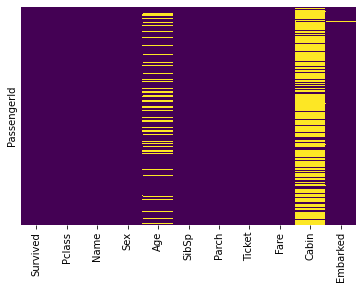

In [8]:
sns.heatmap(titanic.isnull(),cmap='viridis', yticklabels=False,cbar=False)
#yticklabels=False to hide all y axis numbers
#cbar=False means to hide the bar that comes at right hand side

Roughly 20% of Age data is missing .The proportion of age is small enough for reasonable replacement from some form of imputation looking the Cabin columns we are missing to much data to do somethinguseful at basic level we drop it later or change it into 'cabin known: 1 or 0'

In [9]:
titanic.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

Here we have int64(4), object(5), and float64(2) values in the dataset

# EDA

In [10]:
corr=titanic.corr()
corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

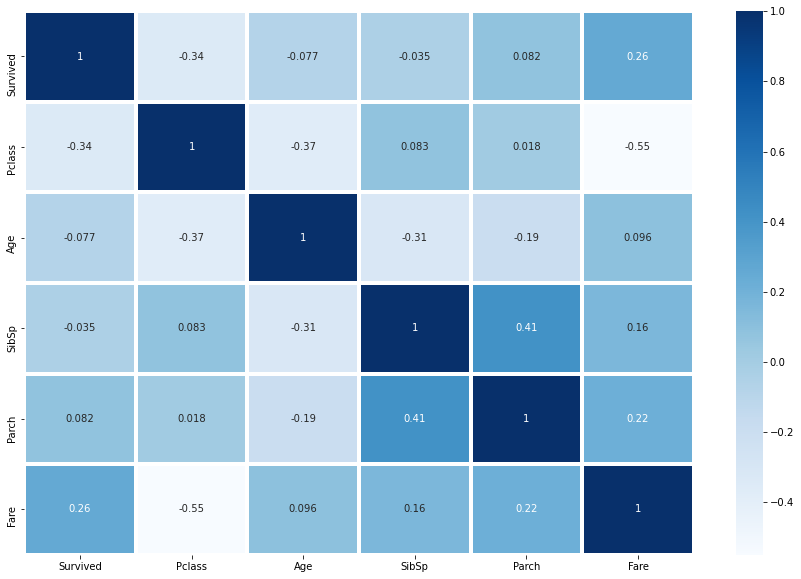

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,cmap='Blues',annot=True,linewidth=3)

 - Here we can notice Parch(Number of Parents/Children Aboard) column is highly positive corelated with Survived column means there were high impact on survival
 - and Age is negatively corelated with survival that age has high negative impact on survival.

<AxesSubplot:xlabel='Survived', ylabel='count'>

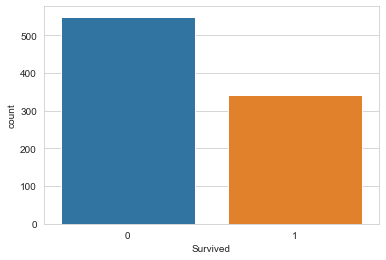

In [12]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", data=titanic)

- We can see here Data is not fully balance but we'll treat the imbalance.
- We have aroun 330 survived and around 560 not survived people.

<AxesSubplot:xlabel='Survived', ylabel='count'>

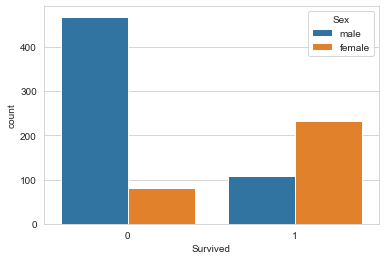

In [13]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", data=titanic,hue='Sex')

- Here we check count servived or and not survived column, there we see not survived male count is around 500 and not survived female count below than 100

- and the other side we see in survived count females are more than males that means at the time of incident female were the prirority to be servived.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

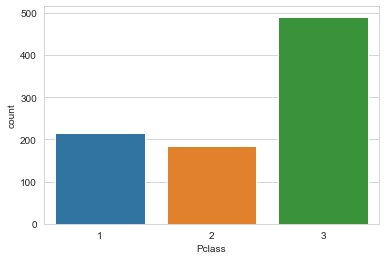

In [14]:
sns.countplot(x='Pclass', data=titanic)

- we notice here most of the people were in Pclass 3, must be including staff and other workers on ship.

<AxesSubplot:xlabel='Survived', ylabel='count'>

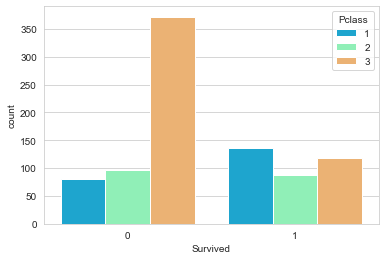

In [15]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=titanic,hue='Pclass',palette='rainbow')

- Here we in Pclass 3 having more not survived people that means most of the people were in Pclass 3.

- There we notice first prirority were given to Pclass 1 get survive Pclass 3 was the last prirority.

<AxesSubplot:xlabel='Age'>

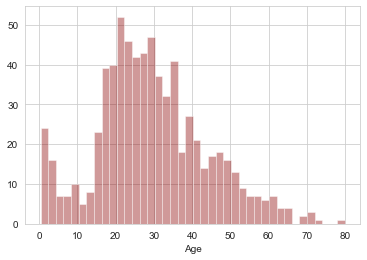

In [16]:
sns.distplot(titanic['Age'].dropna(),kde=False, color='darkred',bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

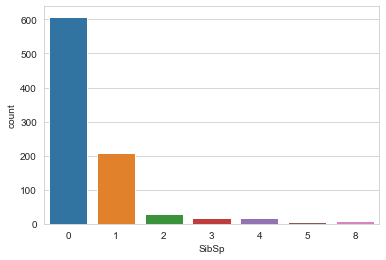

In [17]:
sns.countplot(x='SibSp',data=titanic)

- Here we see the people those are with their sibling.
- around 600 people don't have siblings or spouse, arounf 200 people having 1 sibling or spouse and other people having more that 1 sibling and spouse.

<AxesSubplot:>

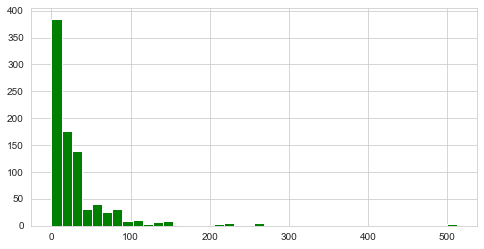

In [18]:
titanic['Fare'].hist(bins=40,color='green',figsize=(8,4))

- Here we see the fare of travel(people who bought ticket) most (around 375) of people we notice having 0 fare means they must be worked and staff member on ship

<AxesSubplot:xlabel='Parch', ylabel='count'>

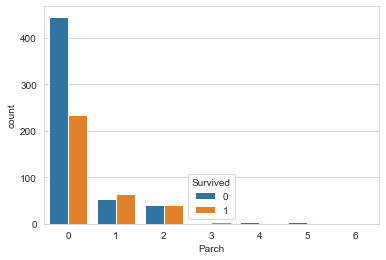

In [19]:
sns.countplot(x='Parch', hue='Survived', data=titanic)

- Here we can notice most survived was travelling alone having no Parents/Children while journey.

# Data Cleaning

In [20]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

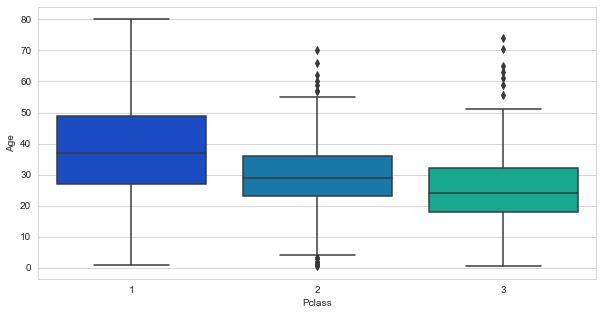

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Pclass',y='Age',palette='winter', data=titanic)

There are 3 passenger class in our dataset

- We notice here wealtheir in higher class seems older which makes sense. we'll use this average age values to impute based on Pclass for age.

- Here we can see Pclass 1 average of age is arond 37 and Pclass 2 it's around 29 Pclass 3 it's around 24

- so filling the age NaN values with average of Age.

In [22]:
# create a function to fill the missing age data

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [23]:
titanic['Age']=titanic[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:ylabel='PassengerId'>

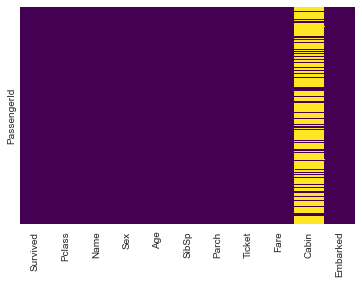

In [24]:
sns.heatmap(titanic.isnull(),cmap='viridis',yticklabels=False, cbar=False)

As we can see Age value has been filled.

In [25]:
titanic.drop('Cabin', axis=1, inplace=True)

  - We dropping the cabin column because it identity of cabins and most of values are NaN, won't help for prediction

In [26]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:ylabel='PassengerId'>

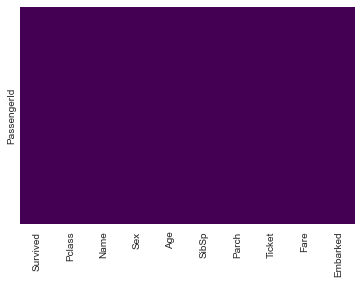

In [27]:
sns.heatmap(titanic.isnull(),cmap='viridis', yticklabels=False, cbar=False)

 - Still we notice there are null values in Embark column

In [28]:
titanic.loc[titanic['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


So here from the above cell we can see in Embarked column have 2 null values.

so let's fill the NaN values with Mode of this column

In [29]:
titanic['Embarked']=titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

<AxesSubplot:ylabel='PassengerId'>

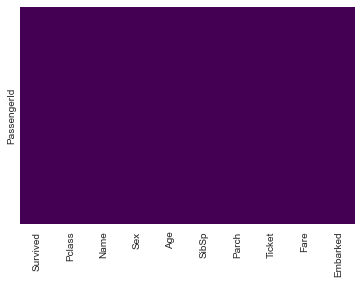

In [30]:
sns.heatmap(titanic.isnull(),cmap='viridis', yticklabels=False,cbar=False)

 -  Here we can notice null values in Embarked columns have been filled

# Dropping unnecessary columns there will be no use of these columns for prediction.

In [31]:
titanic.drop('Name', axis=1, inplace=True)

In [32]:
titanic.drop('Ticket', axis=1, inplace=True)

In [33]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [34]:
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

so here we have int64(4), object(2) and float64(2) values in the new data set

converting into categorical features

we need to convert categorical features into dummie cariables using pandas otherwise our machine learning model won't be able to take those features as input

In [35]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

so here we can see we don't have any null value present in the dataset

# Using LabelEncoder for converting categorical to numerical

In [36]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
titanic['Sex']= le.fit_transform(titanic['Sex'])
titanic['Embarked']= le.fit_transform(titanic['Embarked'])

In [37]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2


In [38]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [39]:
titanic.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

So here from the above 2 cells we can notice that now we don't have any null value present in the data set and data have int64(6) and float64(2) values

# Outliers Removal

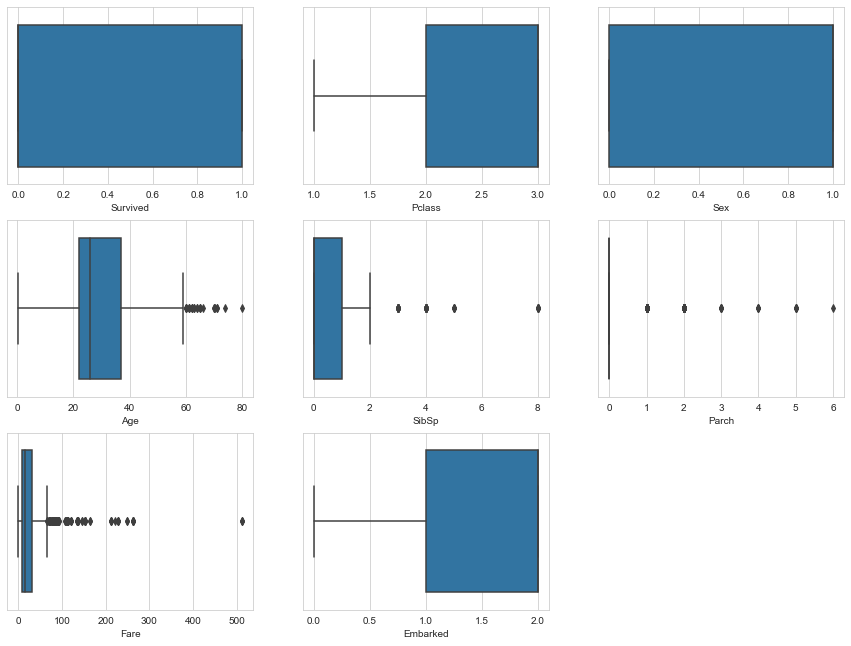

In [40]:
plt.figure(figsize=(15,15))
for i in enumerate(titanic):
    plt.subplot(4,3,i[0]+1)
    sns.boxplot(titanic[i[1]])

Here we can see few columns having Outliers present . So let's remove them.

# zssore

In [41]:
from scipy import stats
from scipy.stats import zscore
z= np.abs(zscore(titanic))
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
       5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
       4, 4, 3, 5, 4, 5], dtype=int64))


In [42]:
titanic_1= titanic[(z<3).all(axis=1)]
print("With outliers::", titanic.shape)
print("After removing outliers::",titanic_1.shape)

With outliers:: (891, 8)
After removing outliers:: (820, 8)


- using zscore method it removes 71 rows.

# IQR method

In [43]:
#IQR
from scipy import stats
IQR = stats.iqr(titanic[['Survived','Pclass','Parch','Age','Fare','SibSp','Parch']])
IQR

7.875

In [44]:
Q1 = titanic.quantile(0.25)
Q3 = titanic.quantile(0.75)

In [45]:
titanic_out = titanic[~((titanic < (Q1 - 1.5 * IQR)) |(titanic > (Q3 + 1.5 * IQR))).any(axis=1)]
print(titanic_out.shape)

(611, 8)


 -  Using IQR method there is Huge data loss . So considering the ZSCORE Method.

In [46]:
titanic=titanic_1

In [47]:
titanic.shape

(820, 8)

so here we have 820 rows and 8 columns after removing outliers.

# Skewness Handling

In [48]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

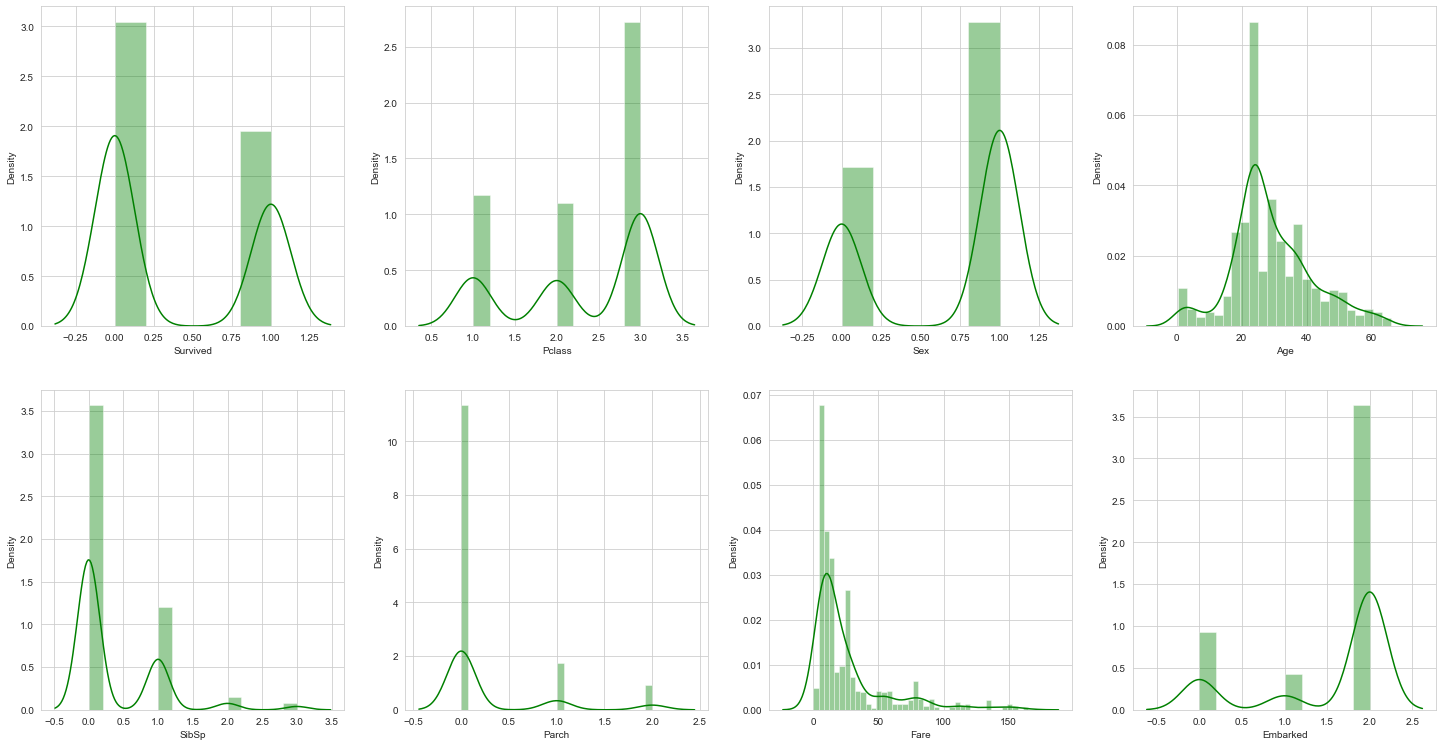

In [49]:
plt.figure(figsize=(25,20))
for i in enumerate(titanic):
    plt.subplot(3,4,i[0]+1)
    sns.distplot(titanic[i[1]],color='g')

In [50]:
titanic.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.447804
SibSp       1.979577
Parch       2.122629
Fare        2.318761
Embarked   -1.277386
dtype: float64

We can notice that there is skewness in the columns

- Pclass
- Sex
- SibSp
- Parch
- Fare
- Embarked

but we only treat the numerical columns (given below) because other columns were changed catogorical to numerical.

- Pclass
- SibSp
- Parch
- Fare

In [51]:
from sklearn.preprocessing import power_transform
titanic[['Pclass','SibSp','Parch','Fare']]=power_transform(titanic[['Pclass','SibSp','Parch','Fare']],method='yeo-johnson')

In [52]:
titanic.skew()

Survived    0.450825
Pclass     -0.429718
Sex        -0.664152
Age         0.447804
SibSp       0.948944
Parch       1.581505
Fare       -0.018602
Embarked   -1.277386
dtype: float64

We can notice skewness almost removed from the targeted columns.

# Dividing Data into x and y

In [53]:
x=titanic.drop(['Survived'],axis=1)
y=titanic['Survived']

In [54]:
x.shape

(820, 7)

In [55]:
y.shape

(820,)

# Scalling x values

In [56]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [57]:
pd.DataFrame(x)

,0,1,2,3,4,5,6
0,1.000000,1.0,0.329064,0.926317,0.0,0.445667,1.0
1,0.000000,0.0,0.573041,0.926317,0.0,0.855230,0.0
2,1.000000,0.0,0.390058,0.000000,0.0,0.461339,1.0
3,0.000000,0.0,0.527295,0.926317,0.0,0.803218,1.0
4,1.000000,1.0,0.527295,0.000000,0.0,0.464103,1.0
...,...,...,...,...,...,...,...
815,0.373447,1.0,0.405306,0.000000,0.0,0.549814,1.0
816,0.000000,0.0,0.283318,0.000000,0.0,0.701010,1.0
817,1.000000,0.0,0.359561,0.926317,1.0,0.656525,1.0
818,0.000000,1.0,0.390058,0.000000,0.0,0.701010,0.0


# Imbalanced Learn

# Using RandomUnderSampler

<AxesSubplot:xlabel='Survived', ylabel='count'>

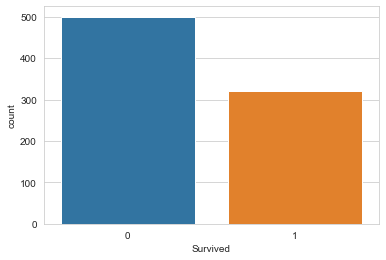

In [58]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", data=titanic)

- We can see here Data is not fully balanced but we'll treat the imbalance

- we have around 330 survived and 500 not survived people

In [59]:
from imblearn.under_sampling import RandomUnderSampler

In [60]:
rus = RandomUnderSampler(random_state=42)
x_rus, y_rus= rus.fit_resample(x,y)
print('Original Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_rus.shape)

Original Target dataset shape: (820,)
Resample Target dataset shape (640,)


<AxesSubplot:xlabel='Survived', ylabel='count'>

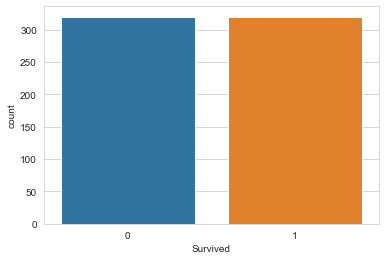

In [61]:
sns.set_style("whitegrid")
sns.countplot(y_rus)

 Now we have balanced data for model training

# Spliting Train and Test Data

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=.27,random_state=42)

In [64]:
x_train.shape

(467, 7)

In [65]:
x_test.shape

(173, 7)

In [66]:
y_train.shape

(467,)

In [67]:
y_test.shape

(173,)

# Model Building

In [68]:
# Importing necessary Libraries

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

# Logistic Regression

In [69]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score;",np.mean(logreg_score))

cross validation score; 0.775


In [70]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.7687861271676301
[[77 15]
 [25 56]]
              precision    recall  f1-score   support

           0       0.75      0.84      0.79        92
           1       0.79      0.69      0.74        81

    accuracy                           0.77       173
   macro avg       0.77      0.76      0.77       173
weighted avg       0.77      0.77      0.77       173

Training accuracy:: 0.7858672376873662
Test accuracy:: 0.7687861271676301


# Decision Tree Classifier

In [71]:
dtc= DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.7359375


In [72]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.7687861271676301
[[69 23]
 [17 64]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.78        92
           1       0.74      0.79      0.76        81

    accuracy                           0.77       173
   macro avg       0.77      0.77      0.77       173
weighted avg       0.77      0.77      0.77       173

Training accuracy:: 0.9850107066381156
Test accuracy:: 0.7687861271676301


# KNeighborsClassifier

In [73]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.746875


In [74]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.7803468208092486
[[75 17]
 [21 60]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        92
           1       0.78      0.74      0.76        81

    accuracy                           0.78       173
   macro avg       0.78      0.78      0.78       173
weighted avg       0.78      0.78      0.78       173

Training accuracy:: 0.8372591006423983
Test accuracy:: 0.7803468208092486


# RandomForestClassifier

In [75]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score rfc:",np.mean(rfc_score))

cross validation score rfc: 0.7671875


In [76]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.791907514450867
[[77 15]
 [21 60]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.81        92
           1       0.80      0.74      0.77        81

    accuracy                           0.79       173
   macro avg       0.79      0.79      0.79       173
weighted avg       0.79      0.79      0.79       173

Training accuracy:: 0.9850107066381156
Test accuracy:: 0.791907514450867


# Ensemble Technique

# 1. AdaBoost Classifier

In [77]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

cross validation score for Ada boost: 0.771875


In [78]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.8092485549132948
[[75 17]
 [16 65]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        92
           1       0.79      0.80      0.80        81

    accuracy                           0.81       173
   macro avg       0.81      0.81      0.81       173
weighted avg       0.81      0.81      0.81       173

Training accuracy:: 0.8094218415417559
Test accuracy:: 0.8092485549132948


# 2. Bagging Classifier

In [79]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Bagging Classifier:",np.mean(bgc_score))

cross validation score for Bagging Classifier: 0.7609375


In [80]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

0.8034682080924855
[[80 12]
 [22 59]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        92
           1       0.83      0.73      0.78        81

    accuracy                           0.80       173
   macro avg       0.81      0.80      0.80       173
weighted avg       0.81      0.80      0.80       173

Training accuracy:: 0.9721627408993576
Test accuracy:: 0.8034682080924855


# 3. Gradient Boosting Classifier

In [81]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

cross validation score for Gradient Boosting Classifier: 0.7984375


In [82]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

0.791907514450867
[[79 13]
 [23 58]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        92
           1       0.82      0.72      0.76        81

    accuracy                           0.79       173
   macro avg       0.80      0.79      0.79       173
weighted avg       0.79      0.79      0.79       173

Training accuracy:: 0.8972162740899358
Test accuracy:: 0.791907514450867


Observation:
      Choosing:
             
            - ADA BOOST CLASSIFIER as final model
             for Hyper Parameter tuning because both train and test accuracies are pretty close.
            - Rest of the models having huge difference between train and test accuracies so not considering them.

# HYPER PERAMETER TUNING

In [88]:
adb=AdaBoostClassifier()
param_grid={
    'algorithm' : ['SAMME.R'],
    'n_estimators':[50,200,10],
    'learning_rate':[0.1,0.5,1.0],
    'random_state':[10]
}

In [89]:
adb_grid=GridSearchCV(AdaBoostClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [91]:
adb_grid.fit(x_train,y_train)
adb_pred=adb_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,adb_pred))

Fitting 4 folds for each of 9 candidates, totalling 36 fits
Accuracy after parameter tuning:: 0.8208092485549133


In [92]:
adb_grid.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 0.5,
 'n_estimators': 10,
 'random_state': 10}

# Model training with best Parameters

In [93]:
best_param={
    'algorithm': ['SAMME.R'],
    'learning_rate': [0.5],
    'n_estimators': [10],
    'random_state': [10]       }

In [95]:
best_adb_grid=GridSearchCV(AdaBoostClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [96]:
best_adb_grid.fit(x_train,y_train)
best_adb_pred=best_adb_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_adb_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy after parameter tuning:: 0.8208092485549133


As we can notice after HYPER PERAMETER TUNING model accuracy got increased.

# Report Of AdaBoostClassifier

In [97]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_adb_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.83      0.84      0.83        92
           1       0.81      0.80      0.81        81

    accuracy                           0.82       173
   macro avg       0.82      0.82      0.82       173
weighted avg       0.82      0.82      0.82       173



<AxesSubplot:>

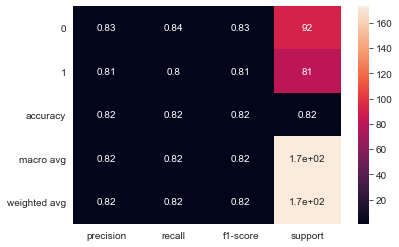

In [99]:
clsf_repo = classification_report(y_test,best_adb_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T,annot=True)

In [100]:
from sklearn.metrics import roc_auc_score

In [101]:
print("roc auc score::",roc_auc_score(y_test,best_adb_pred))

roc auc score:: 0.8197128287707997


In [102]:
from sklearn.metrics import roc_curve

In [103]:
fpr1, tpr1, thresh1 = roc_curve(y_test, best_adb_pred, pos_label=1)

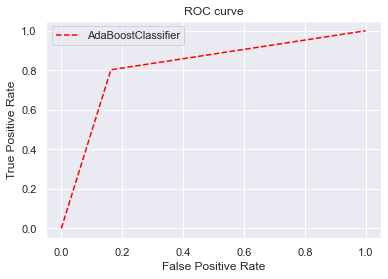

In [105]:
#plotting ROC CURVE

sns.set_theme(style="darkgrid")
plt.plot(fpr1, tpr1, linestyle='--',color='red',label='AdaBoostClassifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')

According to the all result Ada Boost Classifier will be the best model for prediction, because all other models are overfit. 

# Saving The Model:

In [106]:
import joblib

In [107]:
joblib.dump(best_adb_grid.best_estimator_,'Titanic_Prediction_Project.obj')

['Titanic_Prediction_Project.obj']